# Atividade prática 
### Robô aspirador autônomo

Vocês estão projetando um sistema para calcular a trajetória de um robô aspirador autônomo.
Inicialmente, o sistema deve ser capaz de conduzir o robô ladeando as paredes de um cômodo sem que haja colisões.
Por isso, ele deverá passar pelo seguinte teste.

Considerem uma parede representada por uma reta $L$ no plano euclideano, definida pelos pontos $P(12,12)$ e $Q(24,24)$.
Suponha o robô inicialmente posicionado no ponto $O(0,17\delta)$, onde $\delta = 2^{-53}$.
A tarefa de vocês é calcular uma trajetória para que o robô se desloque até que a distância horizontal entre $O$ e sua posição ao final da trajetória atinja $34\delta$.

O robô deve se manter sempre o mais próximo possível da parede, mas nunca andar sobre ela, nem atravessá-la.
A cada movimentação do robô, ele pode dar um passo de tamanho $\delta$ ao longo do eixo $x$ (andar na horizontal) ou do eixo $y$ (andar na vertical), ou de ambos ao mesmo tempo (andar na diagonal).

## Teste de orientação

Os únicos dados que estarão disponíveis para embasar a decisão de parada ou movimentação do robô serão os pontos $O(O_x, O_y)$, $P(P_x, P_y)$, $Q(Q_x, Q_y)$ e sua posição atual, denotada por $R(R_x,R_y)$.
É possível classificar a posição relativa do ponto $R$ com relação à reta $L$ gerada por $P$ e $Q$ como:

* à esquerda de $L$;
* sobre a reta $L$;
* à direita de $L$.

Mais especificamente,no  $\mathbb{R} \times \mathbb{R}$, esta caracterização é consequência natural do que conhecemos como transformação linear. Em essência , dada uma base do $\mathbb{R}^2$ uma transformação linear estica e rotaciona estes vetores é por consequência pode transformar os vetores gerados por eles também. Observamos primariamente a matriz de transformação linear que leva vetores da base canônica em vetores da base canônica. Logo para vetores de coordenadas $(a,b)$ a transformação levará no próprio $(a,b)$.


$
\begin{bmatrix}
1 & 0 \\
0 & 1 \end{bmatrix} \cdot  \begin{bmatrix}
a   \\
b
 \end{bmatrix} =  \begin{bmatrix}a \\b\end{bmatrix}$
 
E como sabemos pela construção acima, podemos escrever este vetor da seguinte maneira  $(a,b) = a\hat{i} + b\hat{j}$. Tomando os vetores $\hat{i}$ em vermelho e $\hat{j}$ em verde, o vetor $(a,b)$ pode ser visto da seguinte forma; 



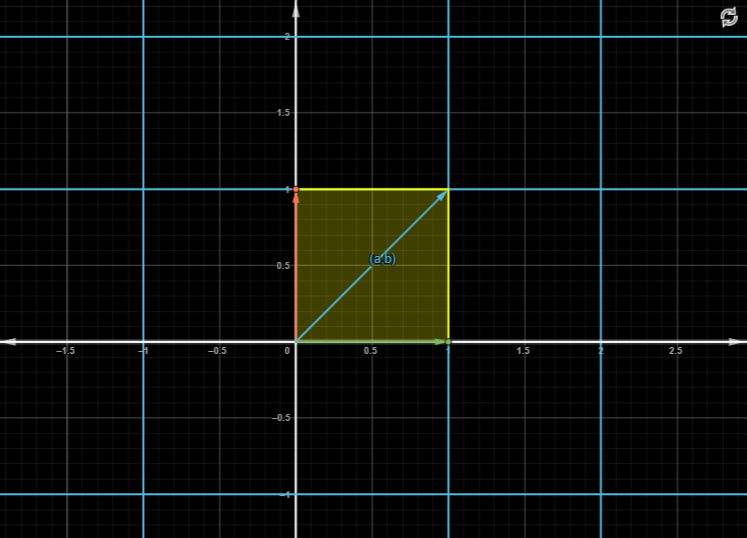

De maneira análoga vejamos o que acontece quando a matriz de transformação linear leva os vetores da base canônica em outra base tais que $T(\hat{i}) = (0,1)$ e $T(\hat{j}) = (1,1)$. Logo, a matriz desta transformação é tal que;


$
\begin{bmatrix}
1 & 1 \\
0 & 1 \end{bmatrix} \cdot  \begin{bmatrix}
a   \\
b
 \end{bmatrix} =  \begin{bmatrix}a+b \\b\end{bmatrix}$




Como a transformação atua também sobre todos os vetores gerados pela base canônica, é fácil visualizar a malha deste novo espaço.

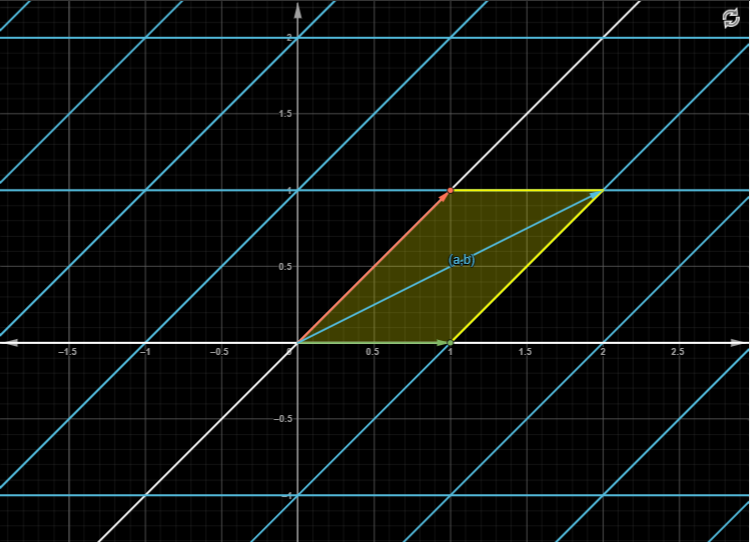

Como isso nos ajudaria a saber a orientação exatamente? Bom, primeiro observemos o seguinte. Note que a área do primeiro quadrado em amarelo é $1$ e a área do paralelogramo em seguida é $1$, mais ainda, os determinantes também são iguais a $1$. Vamos propor mais uma transformação linear para ilustrar melhor. Seja agora $T(\hat{i}) = (0,5)$ e $T(\hat{j}) = (1,1)$.Logo, a matriz desta transformação é tal que;


$
\begin{bmatrix}
5 & 1 \\
0 & 1 \end{bmatrix} \cdot  \begin{bmatrix}
a   \\
b
 \end{bmatrix} =  \begin{bmatrix}(a\cdot 5) + b \\b\end{bmatrix}$
 
 
<p>Se assim o é.

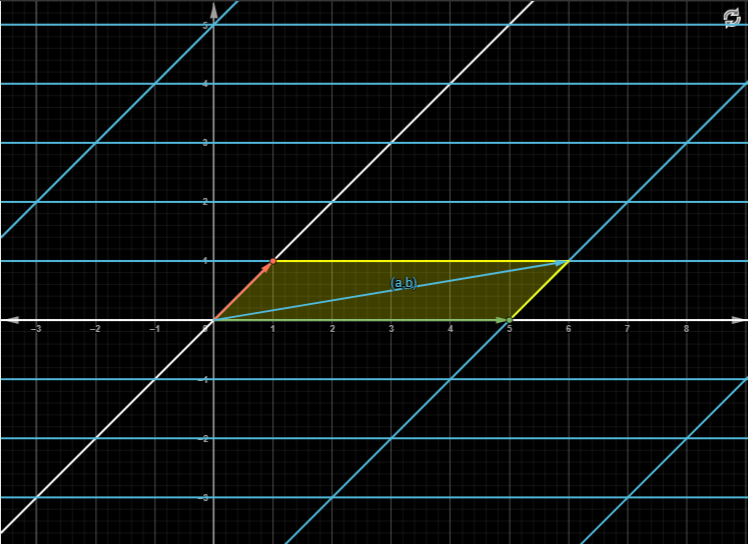

Cujo a área é igual a $5$ e o determinante é igual a $5$! O determinante nos dá a área do paralelogramo gerado por estes vetores. Mas mais ainda, nos indica o quanto de área gerada pelos vetores da base original foi aumentada ou diminuída. E por isso podem haver determinantes também negativas. Os valores negativos indicam que houve uma inversão dos eixos da base. Por exemplo, observemos. $T(\hat{i}) = (1,0)$ e $T(\hat{j}) = (1,-1)$.Logo, a matriz desta transformação é tal que;


$
\begin{bmatrix}
1 & 1 \\
0 & -1 \end{bmatrix} \cdot  \begin{bmatrix}
a   \\
b
 \end{bmatrix} =  \begin{bmatrix}a + b \\-b\end{bmatrix}$

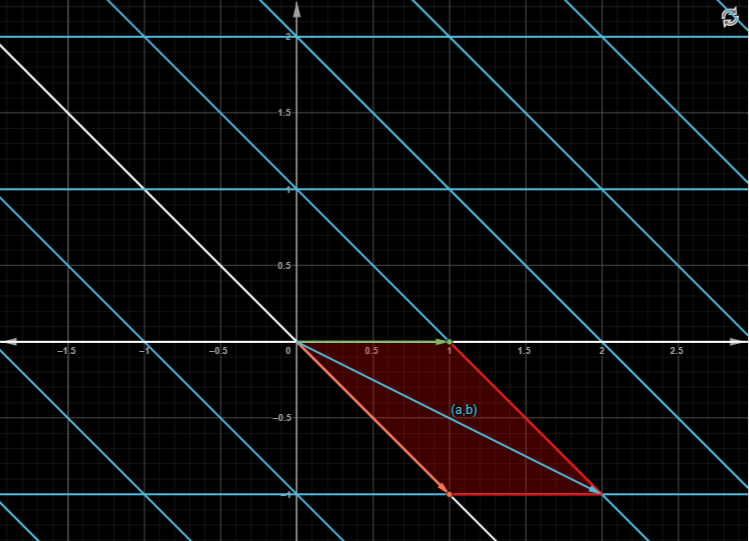

Observe que agora o determinate é igual a $-1$.Caso um deles estaja um sobre o outro, ou seja, linearmente dependentes. O determinante é igual a $0$, definição talvez mais familiar. 

Se assim o é, considere o vetor $(a,b)$ tal que $a=R_x - P_x$ e $b=R_y - P_y$ e o vetor $(c,d)$ tal que $c = Q_x-P_x$ e $d=Q_y - P_y$

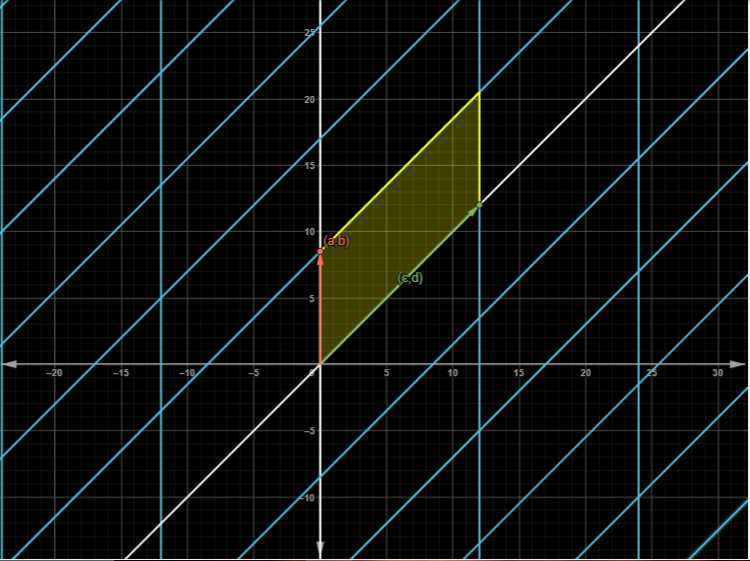

Desta forma sempre que o determinante da matriz \begin{bmatrix}
c & a \\
d & b \end{bmatrix} for positivo, $(a,b)$ estará a esquerda de $(c,d)$ e\ou da reta $L$, no caso contrario estará a direita. E em caso de zero, estaram sobre a mesma reta.

Desta forma, algebricamente, a orientação estabelecida pelos pontos $P$, $Q$ e $R$ varia de acordo com o sinal também do determinante:

\begin{align*}
\operatorname{orientacao}(P,Q,R) &= 
\operatorname{sinal}\left(\det \begin{bmatrix}1 & P_x & P_y\\
1 & Q_x & Q_y\\
1 & R_x & R_y \end{bmatrix}\right).
\end{align*} 


O resultado será $\operatorname{orientacao}(P, Q, R) = +1$ se e somente se o ponto $R$ estiver à esquerda da reta $L$.
Já quando $\operatorname{orientacao}(P, Q, R)$ for igual a $-1$, o ponto $R$ estará à direita de $L$.
Os pontos serão colineares quando obtivermos $\operatorname{orientacao}(P, Q, R) = 0$.

## Cálculo da trajetória

*(a) Descrevam abaixo, em palavras, o algoritmo para o cálculo da trajetória do robô. Caso necessário, vocês poderão inserir figuras para ilustrar seu funcionamento. É mandatório o emprego do teste de orientação apresentado anteriormente.*

A partir de uma reta do tipo Ax + B que contenha as 
coordenadas do plano euclidiano que descreve a parede. O algoritmo se dividirá em duas etapas. Etapa um, definir uma reta em direção a parede e segui-la. Chegando o mais próximo quanto possível da parede, a segunda etapa da trajetória é definir e seguir  uma reta paralela e por conseguinte, de mesma inclinação da reta que descreve a parede até coordenada desejada.


*(b) Coloquem na célula abaixo a implementação do algoritmo que acabaram de descrever.
 É mandatório o uso do teste de orientação apresentado anteriormente.
 Deve-se usar o tipo `float` da Python para armazenar as coordenadas dos pontos.*

In [1]:
# Digite sua implementação do algoritmo aqui.
 
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
 
 
def robo(x , y, x_p, y_p, x_q, y_q):
  delta = 2**-53
 
  #garantindo a escala
  x = x*delta
  y = y*delta
 
  #garantindo valores float
  x_p = x_p * 1.0
  y_p = y_p * 1.0
 
  x_q = x_q * 1.0
  y_q = y_q * 1.0 
 
  matriz = ([[1,x_p,y_p],[1,x_q,y_q],[1,x,y]])
  det = np.linalg.det(matriz)
  sinal = np.sign(det)
 
  # Coeficientes da reta que descreve a parede
  A = (y_q - y_p)/(x_q - x_p)
  B = ((x_q*y_p)-(x_p*y_q)) / (x_q - x_p) 
 
  # reta r0 que decreve a parede com par ordenado (x0,y0)
  # y0 = r0 = A*x0 + B
 
  # reta r1 de trajetória para a parede com par ordenado (x1,y1)
  # y1 = r1 = -A*x1 + (y + A*x)
 
  # reta r2 paralela a parede com par ordenado (x2,y2), que será a trajetória do robô
  # y2 = r2 = A*x2 + (B + sinal*delta)
 
  #intercessão da reta r1 e r2, fim da nossa caminhada até a parede
  Xf = ((y + A*x) - (B + sinal*delta))/(2*A)
  Yf = ((y + A*x) + (B + sinal*delta))/2
 
  #ponto de partida
  Xi = x
  Yi = y
 
  print("Indo até próximo da parede \n")
  distancia1 = math.sqrt((Xf - Xi)**2 + (Yf - Yi)**2)
  #array de coordenadas de aproximação à parede
  array1 = np.array(Xi)
  array2 = np.array(Yi)
 
  while ((Xi != Xf) and (Yi != Yf)):
 
    Xi = Xi + delta*sinal
    array1 = np.append(array1,Xi)
 
    Yi = -A*Xi + (y + A*x)
    array2 = np.append(array2,Yi)
    print(Xi, Yi)
    #deu um passo na diagonal
  
  print("\nDistância percorrida até próximo da parede ",distancia1, "\n")
 
  #Ponto de parada final
  Xf = x + (34*delta)
  Yf = A*(x + (34*delta)) + (B + (delta*sinal))
 
  distancia2 = math.sqrt((Xf - Xi)**2 + (Yf - Yi)**2)
 
  array3 = np.array(Xi)
  array4 = np.array(Yi)
 
  print("\n Indo ao destino final \n")
  while ((Xi != Xf) and (Yi != Yf )):
 
    Xi = Xi + delta*sinal
    array3 = np.append(array3,Xi)
 
    Yi = A*Xi + (B + sinal*delta)
    array4 = np.append(array4,Yi)
    print(Xi, Yi)
    #deu um passo na diagonal
  
  print("\nDistância percorrida ao chegar próximo da parede até o destino final", distancia2, "\n\n")
 
  #Plotar o grafico
 
  #Gerar as ultimas coordenadas pro plot
  array5 = np.array(0)
  array6 = np.array(0)
  Xi = 0
  Yi = 0
 
  while (Xi != Xf):
 
    Xi = Xi + delta*sinal
    array5 = np.append(array5,Xi)
 
    Yi = A*Xi + B
    array6 = np.append(array6,Yi)
 
  distanciatotal = distancia1 + distancia2
  return array1,array2,array3,array4,array5,array6, distanciatotal
 
 
 
array1,array2,array3,array4,array5,array6,distan = robo(0.0, 17.0, 12.0, 12.0, 24.0, 24.0)

Indo até próximo da parede 

1.1102230246251565e-16 1.7763568394002505e-15
2.220446049250313e-16 1.6653345369377348e-15
3.3306690738754696e-16 1.5543122344752192e-15
4.440892098500626e-16 1.4432899320127035e-15
5.551115123125783e-16 1.3322676295501878e-15
6.661338147750939e-16 1.2212453270876722e-15
7.771561172376096e-16 1.1102230246251565e-15
8.881784197001252e-16 9.992007221626409e-16

Distância percorrida até próximo da parede  1.2560739669470201e-15 


 Indo ao destino final 

9.992007221626409e-16 1.1102230246251565e-15
1.1102230246251565e-15 1.2212453270876722e-15
1.2212453270876722e-15 1.3322676295501878e-15
1.3322676295501878e-15 1.4432899320127035e-15
1.4432899320127035e-15 1.5543122344752192e-15
1.5543122344752192e-15 1.6653345369377348e-15
1.6653345369377348e-15 1.7763568394002505e-15
1.7763568394002505e-15 1.887379141862766e-15
1.887379141862766e-15 1.9984014443252818e-15
1.9984014443252818e-15 2.1094237467877974e-15
2.1094237467877974e-15 2.220446049250313e-15
2.2204460492

## Desenho da trajetória

*(c) Desenhe a trajetória calculada usando a matplotlib. Fique à vontade para produzir animações.*

Grafico do trajeto em relação a parede


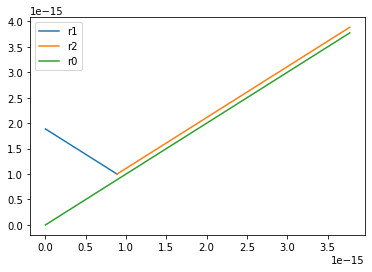

In [ ]:
# Digite o código para desenhar a trajetória aqui.
print("Grafico do trajeto em relação a parede")
plt.plot(array1,array2,array3,array4,array5,array6)
plt.legend(["r1","r2","r0"])

## Comprimento da trajetória

*(d) Calcule e exiba na tela o comprimento da trajetória calculada.*

In [ ]:
# Digite o código para calcular o comprimento da trajetória aqui.

print("\nDistância final percorrida pelas retas r1 e r2: ", distan)
print("Como δ (delta) é 2^(-53), a distância é 36,76955262170046987792703029248 δ ou  26✓2δ")


Distância final percorrida pelas retas r1 e r2:  5.338314359524835e-15
Como δ (delta) é 2^(-53), a distância é 36,76955262170046987792703029248 δ ou  26✓2δ


## Considerações finais

*(e) O que você achou da sua solução? Ela é a melhor possível? Quais foram as principais dificuldades encontradas?*

*A solução não é a mais curta possível. Contudo é a mais geral, uma vez que usa dos coeficientes angulares das retas para esboçar uma trajetória rente a parede independente de onde o robô esteja, ou a parede. A solução é válida desde que não haja obstáculos à trajetória. Além disso, o robô deu os minimos 26 movimentos necessários para chegar ao destino.*

